In [31]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dataset = pd.read_csv('data_processed.csv')

In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset.head()

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication,rank,Other Internship,Success?
0,2015a7ts0081p,pilani,ms,computer science,artificial intelligence/ machine learning,7.93,arizonastate,154.0,170.0,4.0,105.0,"arizona state university, carnegie melon unive...",arizona state university,no,yes,1.5,no,yes,no,yes,209.0,yes,yes
1,2012c6psc6598p,pilani,ms,computer science,NaN,6.70,arizonastate,159.0,167.0,3.5,110.0,"arizona state university, suny buffalo, suny s...","arizona state university, suny buffalo",no,yes,1.5,yes,no,no,no,209.0,no,yes
2,2014a3ps224p,pilani,ms,mechanical engineering,robotics,7.78,arizonastate,154.0,169.0,3.5,110.0,"arizona state university, georgia tech, johns ...","u maryland, u mich",no,no,0.0,no,no,no,no,209.0,no,yes
3,2015a3ps0270p,pilani,ms,computer science,NaN,7.98,arizonastate,148.0,169.0,4.0,103.0,"arizona state university, san jose state unive...","arizona state university, suny buffalo, u flor...",no,no,0.5,yes,no,no,no,209.0,no,yes
4,2012b1a4761p,pilani,phd,bioengineering,tissue engineering,8.40,boston,163.0,164.0,5.0,118.0,"boston university, georgia tech, harvard unive...","boston university, u caifornia irvine, tufts u...",yes,yes,1.5,yes,yes,no,yes,81.0,yes,yes


In [34]:
dataset.columns = dataset.columns.str.lower()

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 23 columns):
bits id                               1426 non-null object
campus                                1426 non-null object
program applied                       1426 non-null object
target discipline                     1426 non-null object
sub-discipline                        1002 non-null object
cgpa                                  1426 non-null float64
university selected                   1282 non-null object
gre score : verbal                    1426 non-null float64
gre score : quant                     1426 non-null float64
gre score : awa                       1426 non-null float64
toefl score                           1426 non-null float64
universities applied                  1425 non-null object
universities admit                    1407 non-null object
universities (funded admit)           1426 non-null object
work experience                       1426 non-null object
dur

In [77]:
dataset.describe()

,cgpa,gre score : verbal,gre score : quant,gre score : awa,toefl score,duration of work experience,rank
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1282.000000
mean,8.250832,158.277069,164.004841,3.835397,109.794158,0.985188,115.024181
std,0.967773,6.437884,6.396394,0.632985,5.722412,1.200720,141.435537
min,0.000000,138.000000,136.000000,2.000000,85.000000,0.000000,0.000000
25%,7.592500,154.000000,163.000000,3.500000,107.000000,0.000000,3.000000
50%,8.310000,159.000000,166.000000,4.000000,110.538160,0.500000,67.000000
75%,9.000000,163.000000,168.000000,4.000000,114.000000,2.000000,178.000000
max,10.000000,170.000000,170.000000,6.000000,120.000000,8.000000,854.000000


Observations 
- The mean rank value is espcially wrong due to imputing values to zero for not successful applications
- Maximum of work duration seems like an outlier

In [78]:
#looking for outliers in duration of work experience
l =dataset[dataset['duration of work experience'] > 10].index
dataset.loc[l,'duration of work experience'] = dataset['duration of work experience'].mean()    #imputing with average

In [79]:
numeric_features = []
for column in dataset.columns:
     if(dataset[column].dtypes == 'float64'):
            numeric_features.append(column)

In [80]:
numeric_features

['cgpa',
 'gre score : verbal',
 'gre score : quant',
 'gre score : awa',
 'toefl score',
 'duration of work experience',
 'rank']

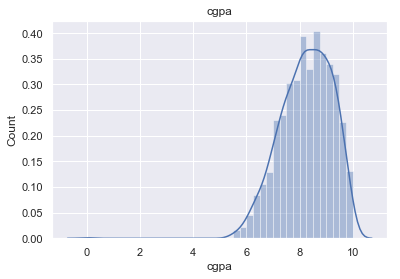

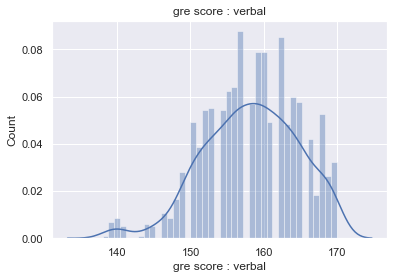

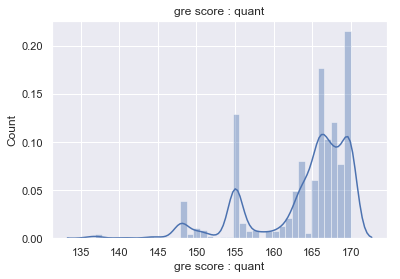

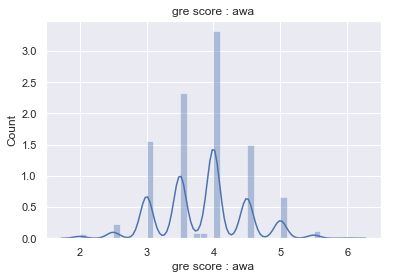

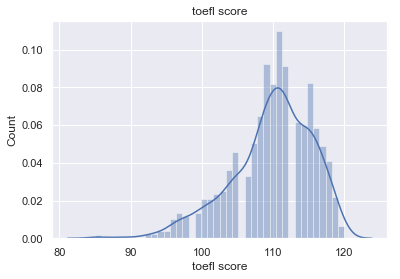

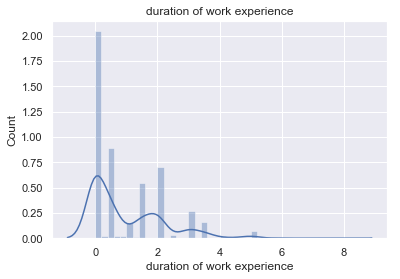

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


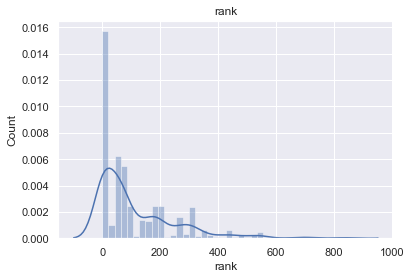

In [218]:
for feature in numeric_features:
    data=dataset.copy()
    sns.distplot(data[feature],bins=40)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()



Rank 0 correspond to unsucessful applications, Awa score values are discrete

In [206]:
dataset.columns

Index(['bits id', 'campus', 'program applied', 'target discipline',
       'sub-discipline', 'cgpa', 'university selected', 'gre score : verbal',
       'gre score : quant', 'gre score : awa', 'toefl score',
       'universities applied', 'universities admit',
       'universities (funded admit)', 'work experience',
       'duration of work experience', 'relevance of ps2/thesis to program',
       'internship other than ps1/ps2', 'consultancy/classes',
       'conference publication', 'rank', 'other internship', 'success?'],
      dtype='object')

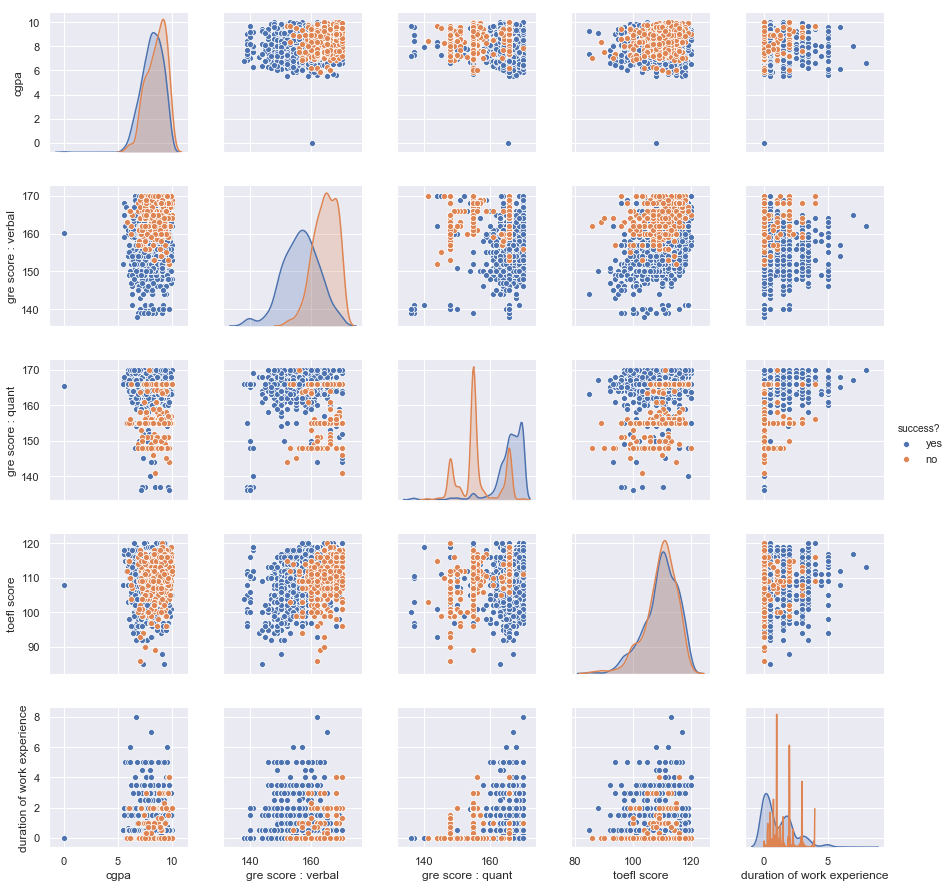

In [216]:
sns.pairplot(dataset, vars=['cgpa',
 'gre score : verbal',
 'gre score : quant',
 'toefl score',
 'duration of work experience'], hue= 'success?', height=2.5)

Categorical features

In [97]:
categorical_features = []
for column in dataset.columns:
     if((dataset[column].dtypes == 'object') & (column != 'bits id') ):                                #excluding bits id
            categorical_features.append(column)

In [96]:
categorical_features

['campus',
 'program applied',
 'target discipline',
 'sub-discipline',
 'university selected',
 'universities applied',
 'universities admit',
 'universities (funded admit)',
 'work experience',
 'relevance of ps2/thesis to program',
 'internship other than ps1/ps2',
 'consultancy/classes',
 'conference publication',
 'other internship',
 'success?']

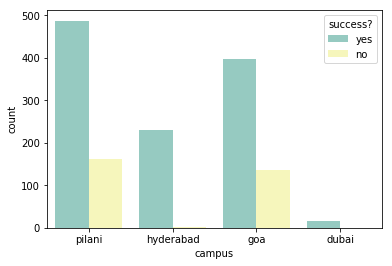

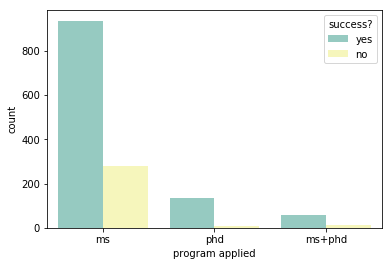

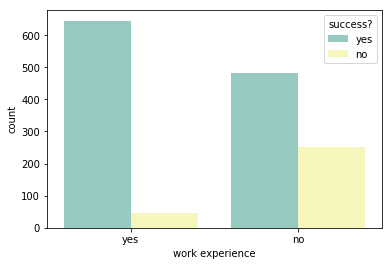

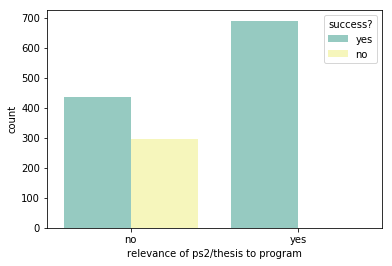

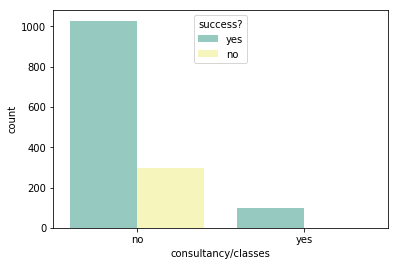

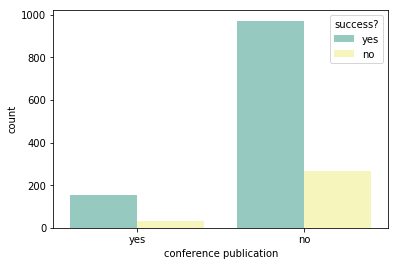

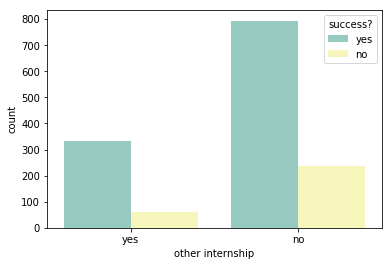

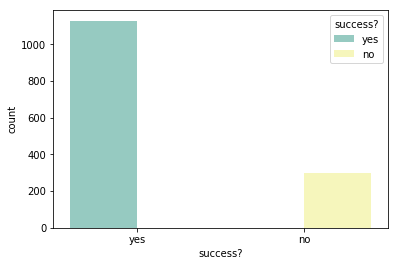

In [103]:
#Plotting features with small number of categories
for feature in categorical_features:
    if (dataset[feature].nunique()< 10):
        sns.countplot(x = feature , data = dataset, hue= dataset['success?'], palette="Set3")
        plt.show()

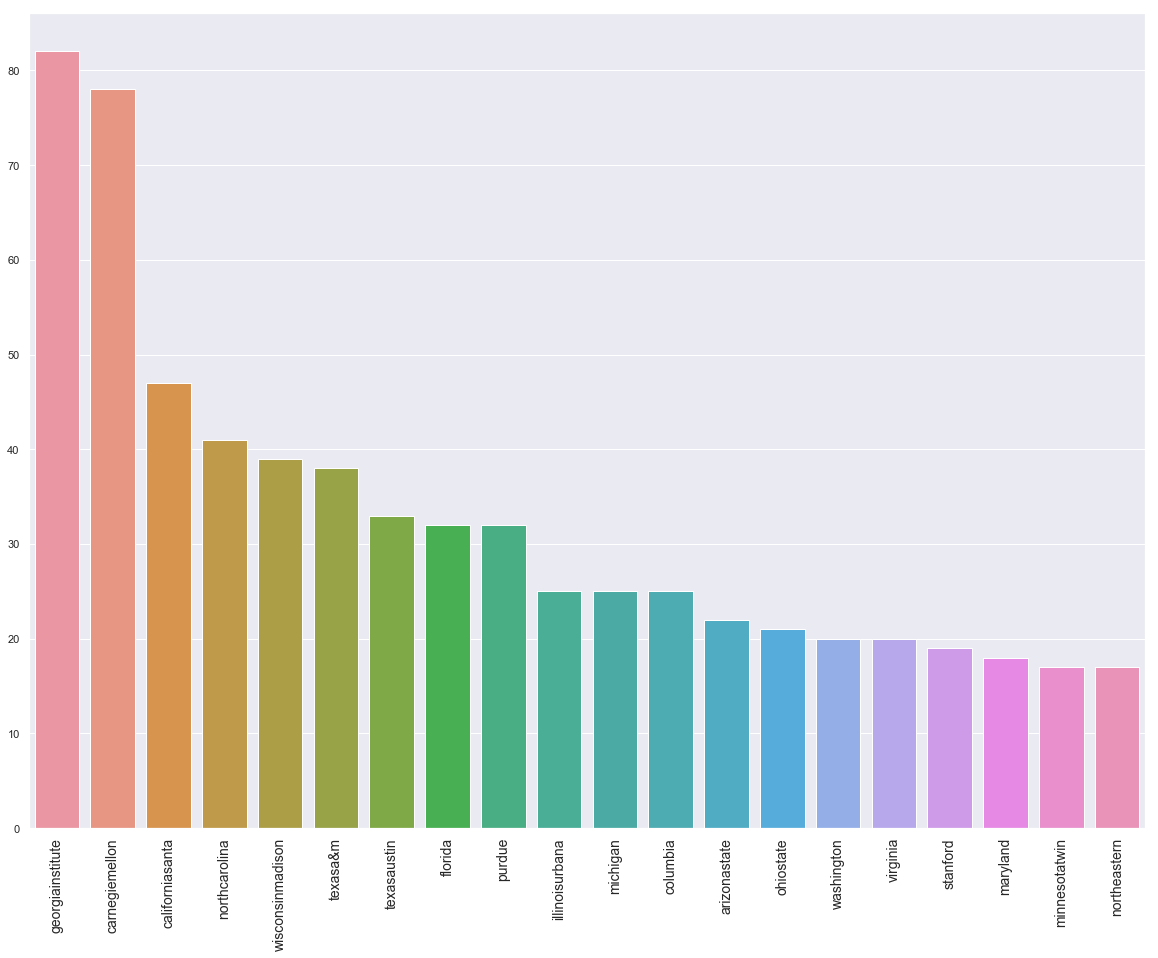

In [172]:
sns.set()
plt.figure(figsize=(20,15))
plt.xticks(fontsize=14, rotation=90)
ser = dataset['university selected'].value_counts()[1:21]                   #Plotting 20 most selected univerisities
sns.barplot(ser.index, ser.values)


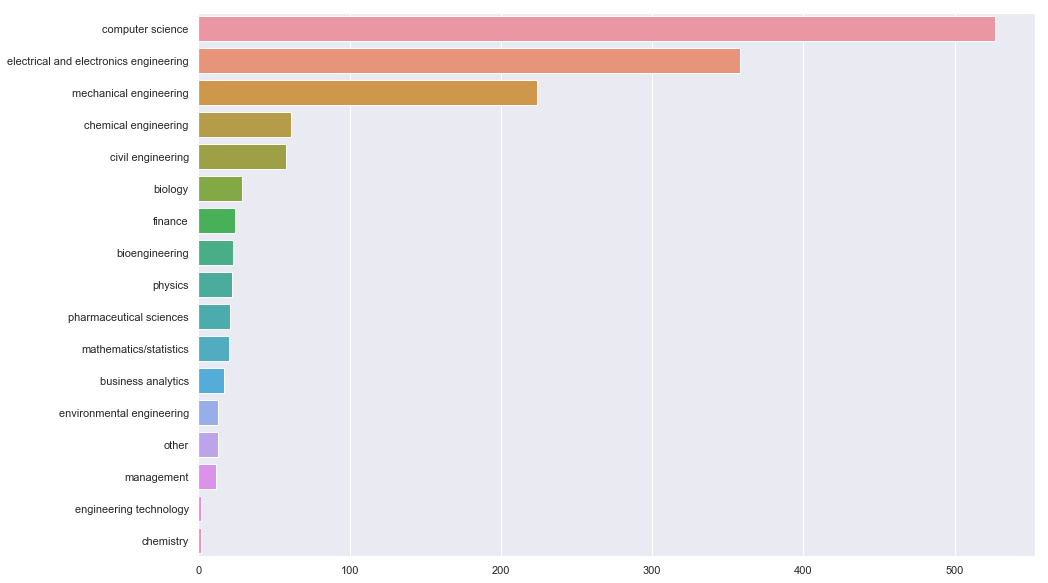

In [197]:
dataset['target discipline'].nunique()
plt.figure(figsize=(15,10))
ser = dataset['target discipline'].value_counts()
sns.barplot(ser.values, ser.index, orient = 'h')

In [210]:
categorical_small

['bits id',
 'campus',
 'program applied',
 'target discipline',
 'sub-discipline',
 'university selected',
 'universities applied',
 'universities admit',
 'universities (funded admit)',
 'work experience',
 'relevance of ps2/thesis to program',
 'internship other than ps1/ps2',
 'consultancy/classes',
 'conference publication',
 'other internship',
 'success?']

As there are a lot of universities selected for classification, making groups based on range of ranks 

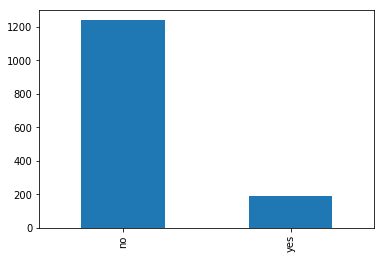

In [49]:
pd.value_counts(dataset['conference publication']).plot.bar()

Binning university selected variable based on ranks 

In [234]:
dataset['rank_segmented'] = pd.cut(dataset[dataset['rank']!=0]['rank'], 10 ) 

In [242]:
dataset['university selected'].groupby(dataset['rank_segmented']).count()

rank_segmented
(0.147, 86.3]     502
(86.3, 171.6]     126
(171.6, 256.9]    142
(256.9, 342.2]    122
(342.2, 427.5]     30
(427.5, 512.8]     27
(512.8, 598.1]     21
(598.1, 683.4]      2
(683.4, 768.7]      7
(768.7, 854.0]      5
Name: university selected, dtype: int64

Dealing with categorical variables 